# VEHICLE CLASSIFICATION

## Author: Gina Torres
## Date Creation : 29-05-2020
## Dates Version: 
    - 10-06-2020 (Edition of appearance)

The main objective of this model is to perform a detailed analysis of the vehicles in the data set. The analysis focuses in differences per lane and per time scale (monthly, daily and  hourly). The results of this model help to get an idea of the behaviour of traffic in different days (week days,  weekends or even national holidays) and help to determine which day is able represent best the behaviour of the entire month in order to create a synthetic data series.

Also, it involves the analysis the vehicle classification (per category) of the different vehicles. Also per lane and per time scale.

- Input: 
    - WIM Dataset (csv file) (For one month)
- Output:
    - Monthly analysis:
        - FREQUENCY_MONTHLY_NEWSUBCAT
            - csv file with monthly count of vehicles in the entire month per category.
        - PROPORTION_MONTHLY_NEWSUBCAT
            - csv file with monthly proportion of vehicles in the entire month.
        - BARPLOT_MONTHLY_NEWSUBCAT
            - Barplot for every category including its frequency.
        - Same monthly analysis but for lane 3 and lane 3:
            - L2_FREQUENCY_MONTHLY_NEWSUBCAT (for L3  just replace L2 for L3)
            - L2_PROPORTION_MONTHLY_NEWSUBCAT (“’)
            - L2_BARPLOT_MONTHLY_NEWSUBCAT (“’)
    - Daily analysis (Performed for each lane):
        - L2_BARPLOT_DAILY_NEWSUBCAT_#day (same for L3)
            - Barplot of category including its frequency for each day of the month.
        - L2_DAILY_NEWSUBCAT (same for L3)
            - csv file with daily count of vehicles per category per lane.
    - Hourly Analysis
        - L2_HOURLY_NEWSUBCAT1_#day (same for L3)
            - csv file with hourly count of vehicles per category per lane per day.

In [1]:
graphics.off()
rm(list = ls())
getwd()

[1] "C:/Users/ginatorresalve/Desktop/PhD/PROGRAMMING/R/TRAFFIC1"

## LOADING LIBRARIES

In [2]:
library(ggplot2) #for plotting
library(chron)  #for working with dates 
library(dplyr)  #used for "select"
library(lubridate)  

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'chron' was built under R version 3.6.3"NOTE: The default cutoff when expanding a 2-digit year
to a 4-digit year will change from 30 to 69 by Aug 2020
(as for Date and POSIXct in base R.)

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'lubridate'

The following objects are masked from 'package:chron':

    days, hours, minutes, seconds, years

The following object is masked from 'package:base':

    date



## ADD PATHS/ DIRECTORY

In [3]:
#Path for data location
path_d<-"C:/Users/ginatorresalve/Desktop/PhD/PROJECTS/MARCEL_COLABORATION/TRAFFIC/DATA_TEST/"

# Path for results location
path_results<-"C:/Users/ginatorresalve/Desktop/PhD/PROGRAMMING/R/TRAFFIC1/RESULTS/CLASSIFICATION/"
path_results_d<-"C:/Users/ginatorresalve/Desktop/PhD/PROGRAMMING/R/TRAFFIC1/RESULTS/CLASSIFICATION/DAILY/"

#Creation of full path of the dataset
name_file<-"RW_12L_April2013_NS.csv"
path_data<-paste(path_d,name_file, sep='')
path_data

# Set path for work
setwd(path_results)


[1] "C:/Users/ginatorresalve/Desktop/PhD/PROJECTS/MARCEL_COLABORATION/TRAFFIC/DATA_TEST/RW_12L_April2013_NS.csv"

## LOADING DATA

In [4]:
data<-read.csv(path_data)
# head(data)
# tail(data)
#str(data)

## PREPARATION OF DATA

In [5]:
#That number is substracted in order to get the correct starting date in the data set. In excel works well but here neede that
# The number was found by trial and error

data$TIME_OK<- data$TIME-719527

#converting to date format
data$TIME_DATE<-as_date(data$TIME_OK)

#converting to date format
as_datetime <- function(x) as.POSIXct("1970-01-01") + as.difftime(x, units = "days")  #1970 is the origin for R but for excel is 1900
data$TIME_ALL<-as_datetime(data$TIME_OK)

# Create a column for days, hours and the respective day of the week 
data$month<- month(data$TIME_ALL)
data$day<- day(data$TIME_ALL)  #column day is an integer
data$hour<- hour(data$TIME_ALL) 
data$DAY_WEEK<-weekdays(data$TIME_ALL)

# Just select data that is needed. We don't need axle data
data<-select(data,'TIME_OK','TIME_DATE','TIME_ALL','DAY_WEEK','month','day','hour','LANE','SPEED','NEWSUBCAT','SUBCAT')

#data set goes from 03-04-2013 to 03-05-2013 so we can eliminate May (month =5)
data<-select(filter(data, month==4), c('TIME_OK','TIME_DATE','TIME_ALL','DAY_WEEK','day','hour','LANE','SPEED','NEWSUBCAT','SUBCAT'))

#Days of the month to analyze
day_s<-c(3:30)

#prelocated lists 
days<-list() 
l2<-list()
l3<-list()

#just a vector of zeros to prelocate the names of the days
day_nam<-rep(0,length(day_s))  

for (i in 1:length(day_s)) 
{
    day_nam[i]<-paste('day',day_s[i],sep='')
    days[[day_nam[i]]]<-select(filter(data, day == day_s[i]), c('TIME_OK','TIME_DATE','TIME_ALL','DAY_WEEK','day','hour','LANE','SPEED','NEWSUBCAT','SUBCAT'))
#     print(x<-dim(as.data.frame(days[[day_nam[i]]]))) #activate to see total num data per day

    #Extraction daily data into lanes
    l2[[day_nam[i]]]<-select(filter(days[[day_nam[i]]], LANE == 'RW-12-L-2'), c('TIME_OK','TIME_DATE','TIME_ALL','DAY_WEEK','day','hour','LANE','SPEED','NEWSUBCAT','SUBCAT'))
    l3[[day_nam[i]]]<-select(filter(days[[day_nam[i]]], LANE == 'RW-12-L-3'), c('TIME_OK','TIME_DATE','TIME_ALL','DAY_WEEK','day','hour','LANE','SPEED','NEWSUBCAT','SUBCAT'))

}

#separation of entire data set into lanes
l2_tot<-select(filter(data, LANE == 'RW-12-L-2'), c('TIME_OK','TIME_DATE','TIME_ALL','DAY_WEEK','day','hour','LANE','SPEED','NEWSUBCAT','SUBCAT'))
l3_tot<-select(filter(data, LANE == 'RW-12-L-3'), c('TIME_OK','TIME_DATE','TIME_ALL','DAY_WEEK','day','hour','LANE','SPEED','NEWSUBCAT','SUBCAT'))


## MONTHLY CLASSIFICATION

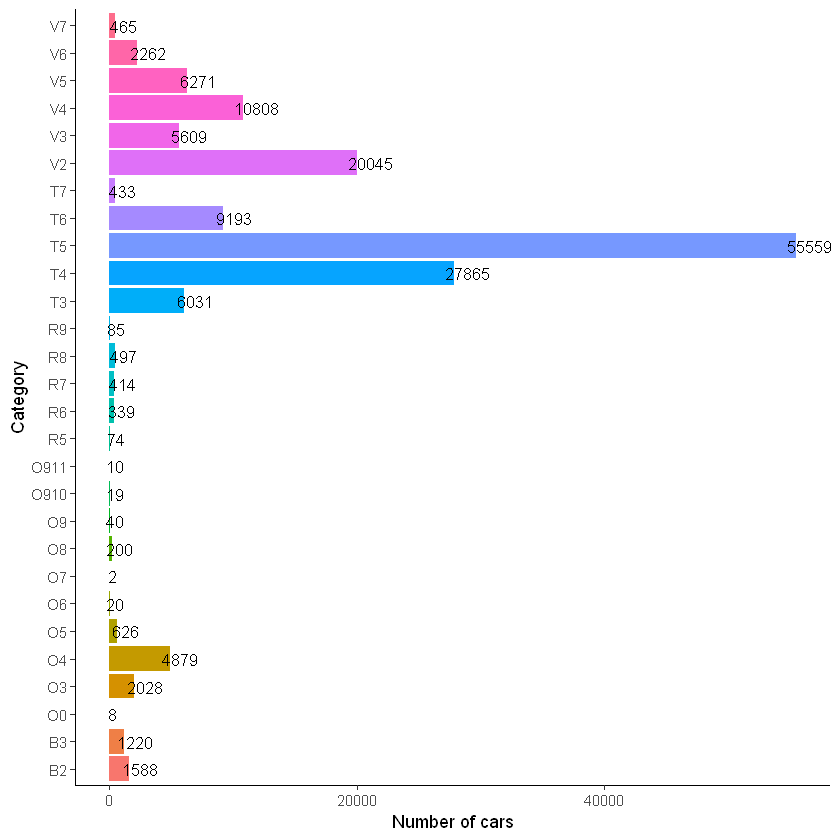

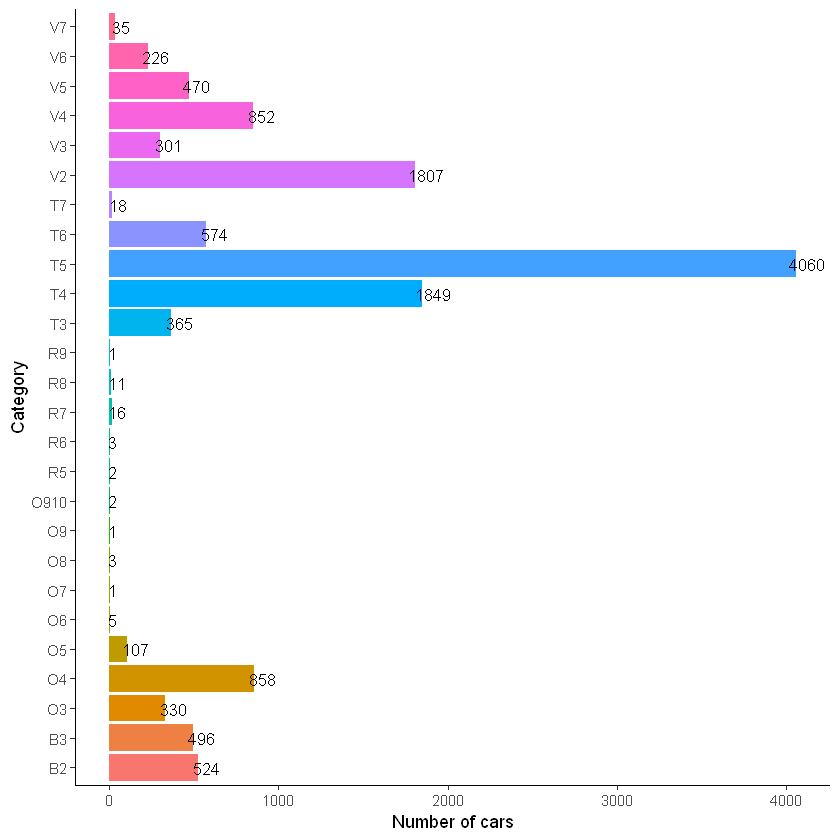

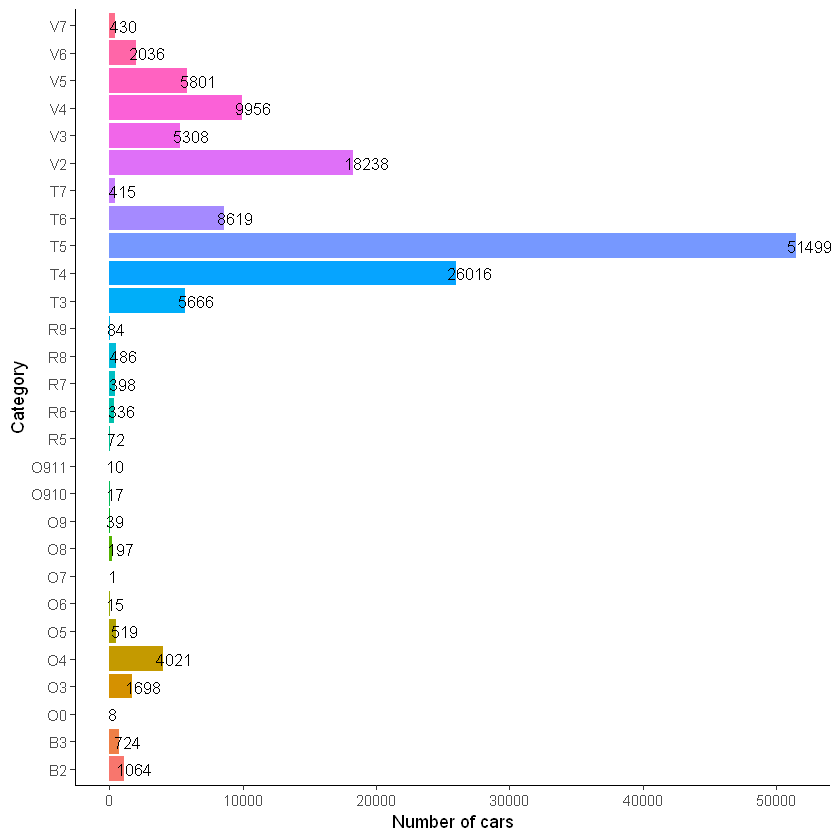

In [6]:
# Exploring all the categories of vechicles
cat<-unique(data['NEWSUBCAT'])
cat<-as.character(cat[,1])
num_cat<-length(cat)

##################### ENTIRE MONTH ####################

#Counting per NEWSUBCAT and SUBCAT. Using table():

class_newsubcat<-table(data['NEWSUBCAT'])
write.table(class_newsubcat,file=paste0(path_results,"FREQUENCY_MONTHLY_NEWSUBCAT",".csv"),sep=",",col.names=F, row.names=F)

#Table of NEWSUBCAT proportion over the whole sample (This will be used to create the sampling)

proportion<-as.data.frame(class_newsubcat/dim(data)[1])
write.table(proportion,file=paste0(path_results,"PROPORTION_MONTHLY_NEWSUBCAT",".csv"),sep=",",col.names=F, row.names=F)

# Visualization barplot of NEWSUBCAT
ggplot(data=data,aes(x=NEWSUBCAT, fill= NEWSUBCAT)) + 
geom_bar(aes(y=(..count..))) + 
labs(x="Category", y="Number of cars") +
coord_flip() +
geom_text(stat='count', aes(label=..count..), hjust = 0.2, color = "black",size = 3.5) +
theme_classic() +
theme(legend.position = "none") +
ggsave(path = path_results, filename = paste('BARPLOT_MONTHLY_NEWSUBCAT.png',sep=''),width=7, height=5) 

################# ENTIRE MONTH PER LANE #########################

######## L2 ##################
class_newsubcat_l2<-table(l2_tot['NEWSUBCAT'])
write.table(class_newsubcat_l2,file=paste0(path_results,"L2_FREQUENCY_MONTHLY_NEWSUBCAT",".csv"),sep=",",col.names=F, row.names=F)

#Table proportion
proportion_l2<-as.data.frame(class_newsubcat_l2/dim(l2_tot)[1])
write.table(proportion_l2,file=paste0(path_results,"L2_PROPORTION_MONTHLY_NEWSUBCAT",".csv"),sep=",",col.names=F, row.names=F)

# Visualization barplot of NEWSUBCAT
ggplot(data=l2_tot,aes(x=NEWSUBCAT, fill= NEWSUBCAT)) + 
geom_bar(aes(y=(..count..))) + 
labs(x="Category", y="Number of cars") +
coord_flip() +
geom_text(stat='count', aes(label=..count..), hjust = 0.2, color = "black",size = 3.5) +
theme_classic() +
theme(legend.position = "none") +
ggsave(path = path_results, filename = paste('L2_BARPLOT_MONTHLY_NEWSUBCAT.png',sep=''),width=7, height=5) 

######## L3 ##################
class_newsubcat_l3<-table(l3_tot['NEWSUBCAT'])
write.table(class_newsubcat_l3,file=paste0(path_results,"L3_FREQUENCY_MONTHLY_NEWSUBCAT",".csv"),sep=",",col.names=F, row.names=F)

#Table proportion
proportion_l3<-as.data.frame(class_newsubcat_l3/dim(l3_tot)[1])
write.table(proportion_l3,file=paste0(path_results,"L3_PROPORTION_MONTHLY_NEWSUBCAT",".csv"),sep=",",col.names=F, row.names=F)

# Visualization barplot of NEWSUBCAT
ggplot(data=l3_tot,aes(x=NEWSUBCAT, fill= NEWSUBCAT)) + 
geom_bar(aes(y=(..count..))) + 
labs(x="Category", y="Number of cars") +
coord_flip() +
geom_text(stat='count', aes(label=..count..), hjust = 0.2, color = "black",size = 3.5) +
theme_classic() +
theme(legend.position = "none") +
ggsave(path = path_results, filename = paste('L3_BARPLOT_MONTHLY_NEWSUBCAT.png',sep=''),width=7, height=5) 

## DAILY ANALYSIS

In [7]:
#prelocate lists
c_newsubcat_l2<-list()
c_newsubcat_l3<-list()

for (i in 1:length(day_s)) 
{
    ############ L2 ####################

    #Counting per NEWSUBCAT. Using table():
    c_newsubcat_l2[[day_nam[i]]]<-table(l2[[day_nam[i]]]['NEWSUBCAT'])
    
    #Visualization barplot of NEWSUBCAT
    g<-ggplot(data=l2[[day_nam[i]]],aes(x=NEWSUBCAT, fill= NEWSUBCAT)) + 
    geom_bar(aes(y=(..count..))) + 
    labs(x="Category", y="Number of cars") +
    coord_flip() +
    geom_text(stat='count', aes(label=..count..), hjust = 0.2, color = "black",size = 3.5) +
    theme_classic() +
    theme(legend.position = "none") +
    ggsave(path = path_results_d, filename = paste('L2_BARPLOT_DAILY_NEWSUBCAT_',day_nam[i],'.png',sep=''),width=7, height=5) 

    ############ L3 ####################
    
    #Counting per NEWSUBCAT. Using table():
    c_newsubcat_l3[[day_nam[i]]]<-table(l3[[day_nam[i]]]['NEWSUBCAT'])

    #Visualization barplot of NEWSUBCAT
    g<-ggplot(data=l3[[day_nam[i]]],aes(x=NEWSUBCAT, fill= NEWSUBCAT)) + 
    geom_bar(aes(y=(..count..))) + 
    labs(x="Category", y="Number of cars") +
    coord_flip() +
    geom_text(stat='count', aes(label=..count..), hjust = 0.2, color = "black",size = 3.5) +
    theme_classic() +
    theme(legend.position = "none") +
    ggsave(path = path_results_d, filename = paste('L3_BARPLOT_DAILY_NEWSUBCAT_',day_nam[i],'.png',sep=''),width=7, height=5) 
}

#Combining all in one matrix and exporting
output <- matrix(unlist(c_newsubcat_l2), ncol = length(day_s), byrow = F)
output1<- matrix(unlist(c_newsubcat_l3), ncol = length(day_s), byrow = F)

write.table(output,file=paste0(path_results_d,"L2_DAILY_NEWSUBCAT",".csv"),sep=",",col.names=F, row.names=F)
write.table(output1,file=paste0(path_results_d,"L3_DAILY_NEWSUBCAT",".csv"),sep=",",col.names=F, row.names=F)
# rows : vehicle type, columns : day

## DAILY ANALYSIS: FITTING DAILY AMOUNT OF VEHICLES

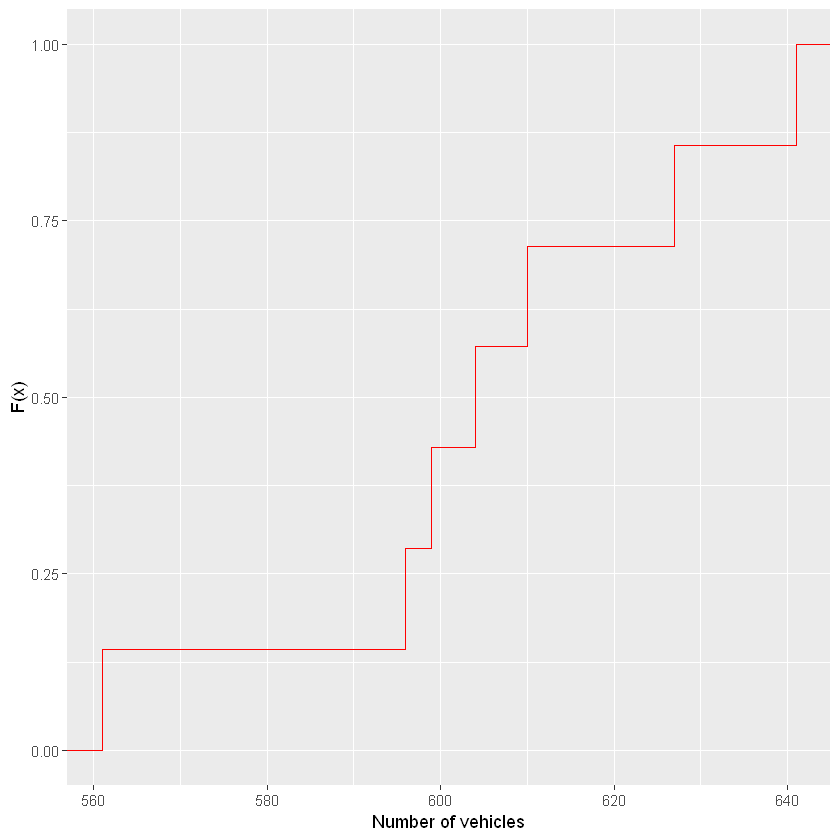

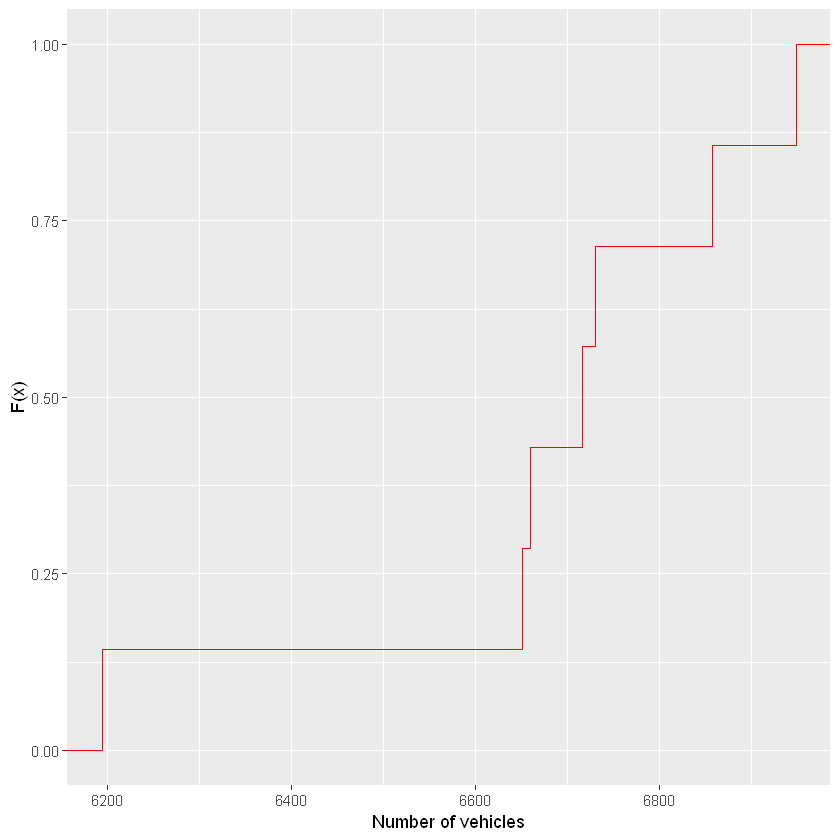

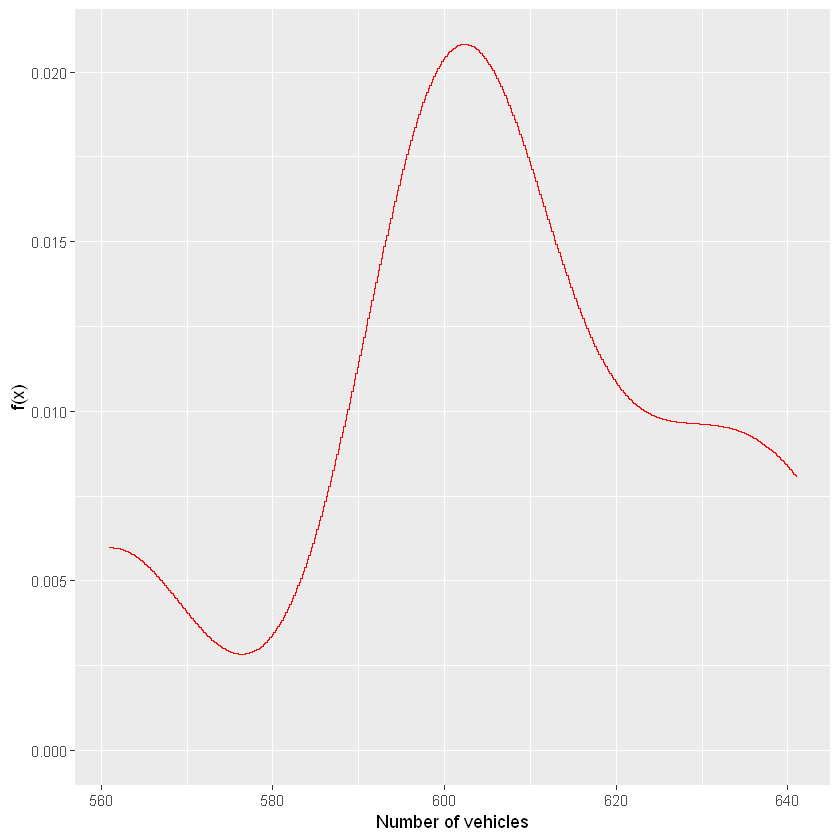

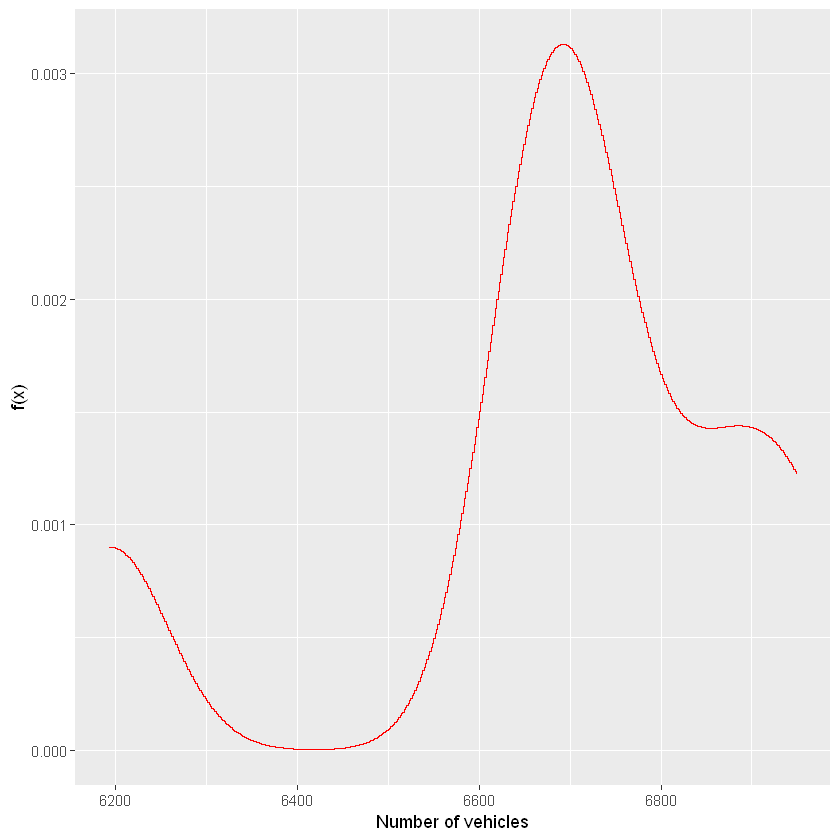

In [8]:
# We pick only week days and no holidays
day_fit<-c(4,10,11,17,18,24,25)
df_nam<-as.character(day_fit)

#prelocate lists
l2_dim<-list()
l3_dim<-list()

#extract the dimensions (# cars) for each day
for (i in 1:length(day_fit)) 
{
    ############# L2 ################
    l2_dim[[df_nam[i]]]<-dim(select(filter(l2_tot, day== day_fit[i]), c('NEWSUBCAT')))[1]
#     print(l2_fit[[df_nam[i]]])
    #############L3 #################
    l3_dim[[df_nam[i]]]<-dim(select(filter(l3_tot, day== day_fit[i]), c('NEWSUBCAT')))[1]
#     print(l3_fit[[df_nam[i]]])
    }

output <- matrix(unlist(l2_dim), ncol = 1, byrow = F)
output1 <- matrix(unlist(l3_dim), ncol = 1, byrow = F)

#Saving the outputs
write.table(output,file=paste0(path_results_d,"DAY_VEHICLES_L2",".csv"),sep=";",col.names=F, row.names=F)
write.table(output1,file=paste0(path_results_d,"DAY_VEHICLES_L3",".csv"),sep=";",col.names=F, row.names=F)

#Computing the ECDF'S
f  <-ecdf(output)
f1  <-ecdf(output1)

fi<-sort(f(output))  #sorting quantiles ascending
fi1<-sort(f(output1))  #sorting quantiles ascendi

#converting the vectors into dataframes for plotting
dat <-data.frame(values=output) 
dat1 <-data.frame(values=output1) 

################################ PLOTTING OF AND EPDF'S, ECDF'S ##############################
ggplot(dat, aes(values)) + 
stat_ecdf(geom = "step", color='red') +
labs(x="Number of vehicles", y="F(x)") +
ggsave(path = path_results_d, filename = paste('L2_ECDF_DAILYFIT','.png',sep=''),width=7, height=5)

ggplot(dat1, aes(values)) + 
stat_ecdf(geom = "step", color='red') +
labs(x="Number of vehicles", y="F(x)") +
ggsave(path = path_results_d, filename = paste('L3_ECDF_DAILYFIT','.png',sep=''),width=7, height=5)

ggplot(dat, aes(values)) + 
stat_density(geom = "step", color='red') +
labs(x="Number of vehicles", y="f(x)") +
ggsave(path = path_results_d, filename = paste('L2_EPDF_DAILYFIT','.png',sep=''),width=7, height=5)

ggplot(dat1, aes(values)) + 
stat_density(geom = "step", color='red') +
labs(x="Number of vehicles", y="f(x)") +
ggsave(path = path_results_d, filename = paste('L3_EPDF_DAILYFIT','.png',sep=''),width=7, height=5)

# By the looks of the pdf and Ecdf, I rather sample from the empirical function and not fit it to any distribution now.

## HOURLY ANALYSIS

In [39]:
#Hours of the day
hour1<-c(0:23)
# Comverting the days into characters (used as names for lists)
hour_nam<-as.character(hour1)

#prelocate lists
h_l2 <-list()  
h_l3 <-list()      
c_h_l2<-list()
c_h_l3<-list()
output<-list()
output1<-list()

#Loop over days
for (i in 1:length(day_s)) 
{
    #Loop over hours
    for (j in 1:length(hour1))
        {

        #Extraction categories per hour
        h_l2[[hour_nam[j]]]<-select(filter(l2[[day_nam[i]]], hour == hour1[j] ), c('NEWSUBCAT'))
        # Count of vehicles per hour in a given day
        c_h_l2[[hour_nam[j]]]<-table(h_l2[[hour_nam[j]]]['NEWSUBCAT'])

        h_l3[[hour_nam[j]]]<-select(filter(l3[[day_nam[i]]], hour == hour1[j] ), c('NEWSUBCAT'))
        c_h_l3[[hour_nam[j]]]<-table(h_l3[[hour_nam[j]]]['NEWSUBCAT'])
    }
    
    #columns:hours rows: types of vehicles
    output[[day_nam[i]]] <- matrix(unlist(c_h_l2), ncol = length(hour1), byrow = F)
    output1[[day_nam[i]]]<- matrix(unlist(c_h_l3), ncol = length(hour1), byrow = F)
    
    #HOURS (ROWS) DAYS (COLUMNS)
    write.table(output[[day_nam[i]]],file=paste0(path_results_d,"L2_HOURLY_NEWSUBCAT1_",day_nam[i],".csv"),sep=",",col.names=F, row.names=F)
    write.table(output1[[day_nam[i]]],file=paste0(path_results_d,"L3_HOURLY_NEWSUBCAT1_",day_nam[i],".csv"),sep=",",col.names=F, row.names=F)
}


In [42]:
# END
Sys.time()

[1] "2020-06-12 17:11:04 CEST"

In [41]:
# METHOD 2: Count number of vechicles per NEWSUBCAT (using dplyr)
# For now turned off because I used table which worked faster and no additional libraries

# data %>% 
#   group_by(NEWSUBCAT) %>%
#   summarise(no_rows = length(NEWSUBCAT))
